# Exercise 2: Pandas

Before you begin, run the cell below to import the appropriate libraries.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

For this worksheet, you'll be using a simplified version of a month's worth of data from NYC's [Green Taxis](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). You can download the data [here](green_tripdata_simple_2016-12.csv). Put it in the same directory as this worksheet. (The simplified version omits a number of fields and randomly samples 100k rows from several million rows, mainly to decrease the file size.)

In [4]:
df = pd.read_csv("./green_tripdata_simple_2016-12.csv")

In [3]:
df

lpep_pickup_datetime  passenger_count  trip_distance  total_amount
0      2016-12-01 00:00:00                1           1.84          9.80
1      2016-12-01 00:00:33                1           4.20         16.30
2      2016-12-01 00:00:47                1           2.34         14.16
3      2016-12-01 00:01:23                1           0.87          6.80
4      2016-12-01 00:01:54                1           4.35         17.30
...                    ...              ...            ...           ...
99995  2016-12-31 23:58:03                1           0.33          5.80
99996  2016-12-31 23:58:54                1           3.77         15.30
99997  2016-12-31 23:59:33                1           3.43         14.30
99998  2016-12-31 23:59:57                1           1.44         10.80
99999  2016-12-31 23:59:58                2           5.20         17.30

[100000 rows x 4 columns]

## Task 1: Indexing columns

Modify the expression in the cell below so that it evaluates to the *average trip distance* of all rows in the data frame.

Expected output: `2.6186307`

In [4]:
df["trip_distance"].mean()

np.float64(2.6186307)

## Task 2: Limiting rows by count

Modify the expression in the cell below so that it evaluates to the sum of the `total_amount` field for rows 100 through 200 in the data set.

Expected output: `1267.5`

In [5]:
df["total_amount"][100:200].sum()

np.float64(1267.5)

## Task 3: Filtering the data frame

Okay, now this one is tricky. Modify the expression in the cell below so that it evaluates to the *total trip distance* (i.e., the sum of the trip distance field) for all *single-occupant rides* (i.e., where the passenger count is 1).

Expected output: `219594.61`

In [6]:
df[df["passenger_count"] == 1]['trip_distance'].sum()

np.float64(219594.61)

## Task 4: Filtering the data frame, part two

Write an expression in the cell below that shows the trip distance of the *longest ride* taken by two or more people.

Expected output: `100.39`

In [7]:
df[df["passenger_count"] >= 2]['trip_distance'].max()

np.float64(100.39)

## Task 5: Plots

In the cell below, write a statement or sequence of statements that draws a pie chart of passenger count frequency. (Hint: use `.value_counts()`.)

Expected output:

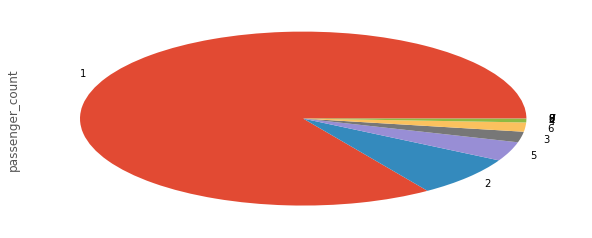

<Axes: ylabel='count'>

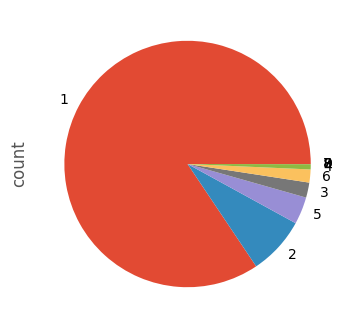

In [8]:
df["passenger_count"].value_counts().plot(kind="pie")

Now, in the cell below, draw a histogram of trip distances. Use 50 bins.

Expected output:

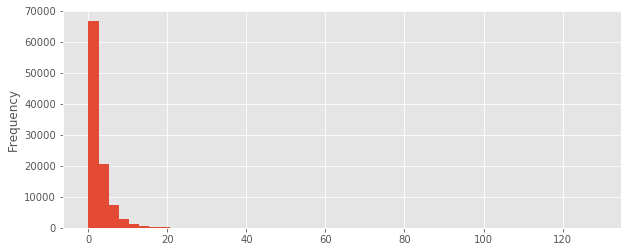

<Axes: ylabel='Frequency'>

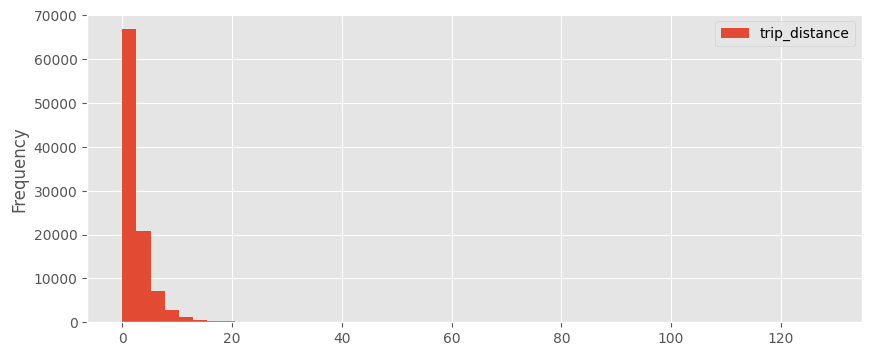

In [9]:
df.plot(kind="hist", y="trip_distance", bins=50)

Okay! This last one is extremely tricky, but I know you can do it. In the cell below, write a statement or series of statements that draws a scatter plot with trip distance as the X axis and the total amount on the Y axis, but only including the rows where the total amount is greater than zero.

Expected output:

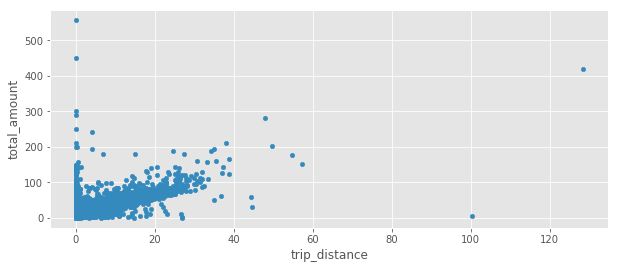

<Axes: xlabel='trip_distance', ylabel='total_amount'>

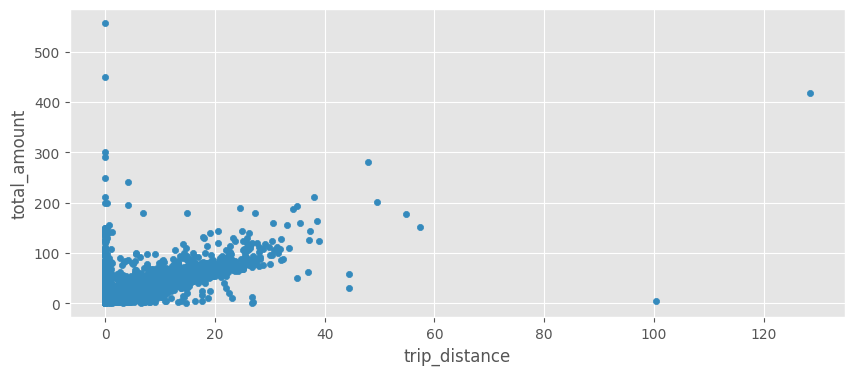

In [32]:
filtered = df[df["total_amount"] > 0]
filtered.plot(kind="scatter", x="trip_distance", y="total_amount")

Excellent! You're done.

# added next class info:

* & bitwise-and
* | bitwise-or
  
total amount is greater than 0 AND the trip distance is greater than 0

In [6]:
# and
df[ (df["total_amount"] >0) & (df["trip_distance"] > 0) ]

lpep_pickup_datetime  passenger_count  trip_distance  total_amount
0      2016-12-01 00:00:00                1           1.84          9.80
1      2016-12-01 00:00:33                1           4.20         16.30
2      2016-12-01 00:00:47                1           2.34         14.16
3      2016-12-01 00:01:23                1           0.87          6.80
4      2016-12-01 00:01:54                1           4.35         17.30
...                    ...              ...            ...           ...
99995  2016-12-31 23:58:03                1           0.33          5.80
99996  2016-12-31 23:58:54                1           3.77         15.30
99997  2016-12-31 23:59:33                1           3.43         14.30
99998  2016-12-31 23:59:57                1           1.44         10.80
99999  2016-12-31 23:59:58                2           5.20         17.30

[98428 rows x 4 columns]

<Axes: xlabel='trip_distance', ylabel='total_amount'>

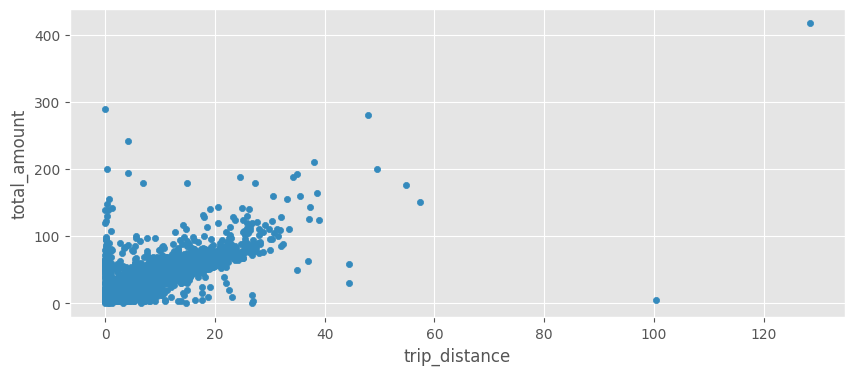

In [7]:
df[ (df["total_amount"] >0) & (df["trip_distance"] > 0) ].plot(kind="scatter", x="trip_distance", y="total_amount")

<Axes: xlabel='trip_distance', ylabel='total_amount'>

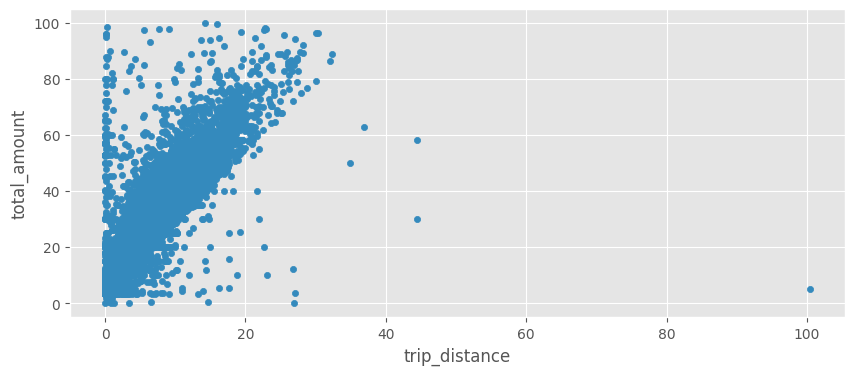

In [9]:
df[ (df["total_amount"] >0) & (df["trip_distance"] > 0) & (df["total_amount"] < 100) ].plot(kind="scatter", x="trip_distance", y="total_amount")

In [12]:
df [ (df["total_amount"] <= 0) | (df["trip_distance"] <= 0) & (df["passenger_count"] > 1)]

lpep_pickup_datetime  passenger_count  trip_distance  total_amount
212    2016-12-01 05:14:51                1           0.80          0.00
237    2016-12-01 06:05:30                1           2.00          0.00
301    2016-12-01 07:21:01                1           6.10          0.00
463    2016-12-01 08:28:58                2           0.00         14.00
508    2016-12-01 08:41:17                2           0.00         12.00
...                    ...              ...            ...           ...
99203  2016-12-31 21:25:37                4           0.00         56.94
99399  2016-12-31 21:58:36                2           0.00         10.38
99480  2016-12-31 22:14:36                1           0.65         -5.80
99835  2016-12-31 23:22:20                1           0.06         -3.80
99991  2016-12-31 23:56:32                1           0.00          0.00

[676 rows x 4 columns]